Material for accuracy of models supplementary figure

In [1]:
import numpy as np
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle as pkl

In [2]:
# Load raw data
sData='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AllDataWithConfounds.p'
#Dictionary that containes the whole dataset (train and test) in pd dataframe
[dXData, aYData] = pkl.load(open(sData, 'rb'))

# Load predictions for all models
# sModelPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/Ensembles' \
#                 '/EnsembleModelSet.p'
# dModels = pkl.load(open(sModelPath, 'rb'))
sTestPredictionPath = '/project/bioinformatics/DLLab/Cooper/Code/AutismProject/AlternateMetrics/Ensembles' \
                '/EnsemblePredictionTestSet.p'
dTestPredictions = pkl.load(open(sTestPredictionPath, 'rb'))

# load test data as well
sTestLoc='/project/bioinformatics/DLLab/Cooper/Code/AutismProject/aTestIndex.p'
aTestLoc=pkl.load(open(sTestLoc,'rb'))
aYTest=aYData[aTestLoc.astype('int'),:]

In [3]:
pdResults=pd.DataFrame(columns=['Atlas', 'MeanVal', 'Predicted'])
for sAtlas in ['basc064', 'basc122', 'basc197']:
    for i in range(50):
        flAvgCV=np.mean([pkl.load(open(f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/ISBIRerun/Dense/Dense_{i:02}combined{sAtlas}TrainROCScoreCrossVal{iCV}.p', 'rb')) for iCV in range(1,4)])
        aTestPredictions = pkl.load(open(f'/project/bioinformatics/DLLab/Cooper/Code/AutismProject/Parallelization/TrainedModels/ISBIRerun/Dense/Dense_{i:02}combined{sAtlas}PredictedResults.p', 'rb'))
        pdResults=pdResults.append(pd.DataFrame.from_dict(
            {
                'Atlas': [sAtlas],
                'MeanVal': [flAvgCV],
                'Predicted': [aTestPredictions]
            }
        ))
        

In [4]:
aPredicted = pdResults[pdResults['Atlas']=='basc064'].sort_values(by='MeanVal', ascending=False).head(5)['Predicted'].iloc[0]
fpr, tpr, thresholds = roc_curve(aYTest, aPredicted)
flScore = roc_auc_score(aYTest, aPredicted)
Sn = tpr
Sp = 1-fpr
Sn[Sp>.6][-1], Sn[Sp>.7][-1], Sn[Sp>.8][-1]

NameError: name 'roc_curve' is not defined

In [11]:
pdResults[pdResults['Atlas']=='basc122'].sort_values(by='MeanVal', ascending=False).head(5)['MeanVal']

0    0.997951
0    0.997951
0    0.995219
0    0.995219
0    0.987705
Name: MeanVal, dtype: float64

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
pdChart = pd.DataFrame(columns=['Atlas', 'Val_AUROC', 'AUROC', 'Sn at 60 Sp', 'Sn at 70 Sp', 'Sn at 80 Sp'])
for sAtlas in ['basc064', 'basc122', 'basc197']:
    for i in range(5):
        flVal = pdResults[pdResults['Atlas']==sAtlas].sort_values(by='MeanVal', ascending=False).head(5)['MeanVal'].iloc[i]
        aPredicted = pdResults[pdResults['Atlas']==sAtlas].sort_values(by='MeanVal', ascending=False).head(5)['Predicted'].iloc[i]
        fpr, tpr, thresholds = roc_curve(aYTest, aPredicted)
        flScore = roc_auc_score(aYTest, aPredicted)
        Sn = tpr
        Sp = 1-fpr
        pdChart=pdChart.append(pd.DataFrame.from_dict({
            'Atlas':[sAtlas],
            'Val_AUROC':[flVal],
            'AUROC':[flScore],
            'Sn at 60 Sp':[Sn[Sp>.6][-1]],
            'Sn at 70 Sp': [Sn[Sp>.7][-1]],
            'Sn at 80 Sp': [Sn[Sp>.8][-1]]
        }))


In [7]:
pdTable=pd.DataFrame(index = ['basc064', 'basc122', 'basc197'], columns=['Val_AUROC','AUROC', 'Sn at 60 Sp', 'Sn at 70 Sp', 'Sn at 80 Sp'])
for sAtlas in ['basc064', 'basc122', 'basc197']:
    for s in pdTable.columns:
        pdTable.loc[sAtlas, s]=f"{pdChart[pdChart['Atlas']==sAtlas][s].min()*100:0.0f}-{pdChart[pdChart['Atlas']==sAtlas][s].max()*100:0.0f}"

In [8]:
pdTable

,Val_AUROC,AUROC,Sn at 60 Sp,Sn at 70 Sp,Sn at 80 Sp
basc064,100-100,75-78,74-80,65-71,51-62
basc122,99-100,76-80,77-81,68-76,57-70
basc197,100-100,76-78,75-81,68-74,60-63


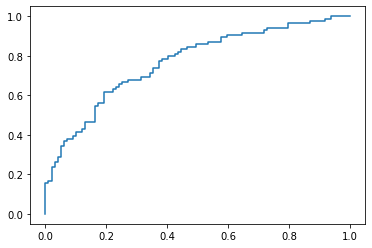

In [38]:
plt.plot(fpr, tpr)